In [4]:
import tensorflow as tf
import os

dir_path = os.path.dirname(os.path.realpath('__file__'))
filename = dir_path + "/../data/titanic/train.csv"

survival = tf.placeholder(tf.bool,    name='survival')
pclass   = tf.placeholder(tf.uint8,   name='pclass')
sex      = tf.placeholder(tf.bool,    name='sex')
age      = tf.placeholder(tf.float64, name='age')

print survival, pclass, sex, age

ds = []

with tf.Session() as sess:
    sess.run( tf.global_variables_initializer())
    with open(filename) as inf:
        next(inf) # Skip header
        for line in inf:
            data = line.strip().split(",")
            #print data
            #did, dsurvival, dpclass, dname, dname2, dsex, dage, dsibsp, dparch, dticket, dfare, dcabin, dembarked = line.strip().split(",")
            
            if (data[6]==""): #if no age is specified then skip this entry
                continue;
                
            dsurvival = data[1] in ['1']
            dpclass   = int(data[2])
            dsex      = data[5] in ['male']
            dage      = float(data[6])

            ds.append([dsurvival, dpclass, dsex, dage])
            #print(dsurvival, dpclass, dsex, dage)
            #print
            
print ds


Tensor("survival_2:0", dtype=bool) Tensor("pclass_2:0", dtype=uint8) Tensor("sex_2:0", dtype=bool) Tensor("age_2:0", dtype=float64)
[[False, 3, True, 22.0], [True, 1, False, 38.0], [True, 3, False, 26.0], [True, 1, False, 35.0], [False, 3, True, 35.0], [False, 1, True, 54.0], [False, 3, True, 2.0], [True, 3, False, 27.0], [True, 2, False, 14.0], [True, 3, False, 4.0], [True, 1, False, 58.0], [False, 3, True, 20.0], [False, 3, True, 39.0], [False, 3, False, 14.0], [True, 2, False, 55.0], [False, 3, True, 2.0], [False, 3, False, 31.0], [False, 2, True, 35.0], [True, 2, True, 34.0], [True, 3, False, 15.0], [True, 1, True, 28.0], [False, 3, False, 8.0], [True, 3, False, 38.0], [False, 1, True, 19.0], [False, 1, True, 40.0], [False, 2, True, 66.0], [False, 1, True, 28.0], [False, 1, True, 42.0], [False, 3, True, 21.0], [False, 3, False, 18.0], [True, 3, False, 14.0], [False, 3, False, 40.0], [False, 2, False, 27.0], [True, 2, False, 3.0], [True, 3, False, 19.0], [False, 3, False, 18.0], [Fa

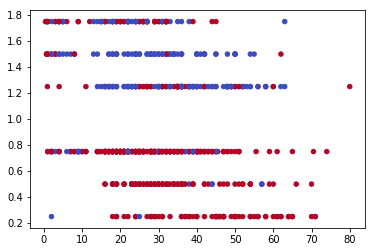

In [6]:
import matplotlib.pyplot as plt

sp_x = []
sp_y = []
sp_s = []
sp_c = []

#for item in ds[:50]:
for item in ds:
    sp_x.append(item[3])                         # age
    sp_y.append(int(item[0]) + float(item[1])/4) # survived + class
    sp_s.append(20)                              # constant size
    sp_c.append(int(item[2]))                    # gender as color
    
#plt.scatter([0,1,2],[1,2,1],[1,20,50],[0,0.5,1])
plt.scatter(sp_x, sp_y, sp_s, sp_c, cmap='coolwarm')

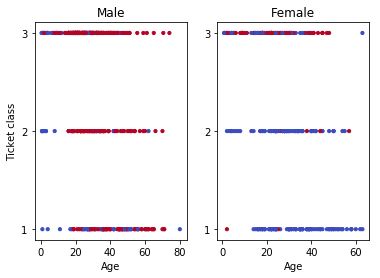

In [7]:
male_x = []
male_y = []
male_s = []
male_c = []

female_x = []
female_y = []
female_s = []
female_c = []

#for item in ds[:50]:
for item in ds:
    if (item[2]):
        male_x.append(item[3])   # age as x
        male_y.append(item[1])   # ticket class as y
        male_s.append(10)        # constant size
        male_c.append(item[0])   # survived as color
    else:
        female_x.append(item[3]) # age as x
        female_y.append(item[1]) # ticket class as y
        female_s.append(10)      # constant size
        female_c.append(item[0]) # survived as color
    
f, sb = plt.subplots(1, 2)
sb[0].scatter(male_x,   male_y,   male_s,   male_c,   cmap='coolwarm_r') # _r means reversed cmap
sb[0].set_title('Male')
sb[0].set_yticks([1,2,3])
sb[0].set_ylabel('Ticket class')
sb[0].set_xlabel('Age')

sb[1].scatter(female_x, female_y, female_s, female_c, cmap='coolwarm_r')
sb[1].set_title('Female')
sb[1].set_yticks([1,2,3])
sb[1].set_xlabel('Age')


In [2]:
def create_file_reader_ops(filename_queue):
    reader = tf.TextLineReader(skip_header_lines=1)
    _, csv_row = reader.read(filename_queue)
    record_defaults = [[0], [0], [0], [""], [""], [0], [0], [0], [0], [0], [""], [""]]
    #did, dsurvival, dpclass, dname, dname2, dsex, dage, dsibsp, dparch, dticket, dfare, dcabin
    did, dsurvival, dpclass, dname, dsex, dage, dsibsp, dparch, dticket, dfare, dcabin, dembarked = tf.decode_csv(csv_row, record_defaults=record_defaults)
                  
    survival = tf.cast(dsurvival in ['1'], tf.bool, 'survival')
    pclass   = tf.cast(dpclass, tf.int32, 'pclass')
    sex      = tf.cast(dsex in ['male'], tf.bool, 'sex')
    age      = tf.cast(dage, tf.float32,'age')
    
    return survival, pclass, sex, age

filename_queue = tf.train.string_input_producer([filename], num_epochs=1, shuffle=False)
survival, pclass, sex, age = create_file_reader_ops(filename_queue)
print survival, pclass, sex, age

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    while True:
        try:
            survival_data, pclass_data, sex_data, age_data = sess.run([survival, pclass, sex, age])
            print(surivval_data, pclass_data, sex_data, age_data)
        except tf.errors.OutOfRangeError:
            break

Tensor("survival_1/x:0", shape=(), dtype=bool) Tensor("DecodeCSV:2", shape=(), dtype=int32) Tensor("sex_1/x:0", shape=(), dtype=bool) Tensor("age_1:0", shape=(), dtype=float32)
INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.FailedPreconditionError'>, Attempting to use uninitialized value input_producer/limit_epochs/epochs
	 [[Node: input_producer/limit_epochs/CountUpTo = CountUpTo[T=DT_INT64, _class=["loc:@input_producer/limit_epochs/epochs"], limit=1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](input_producer/limit_epochs/epochs)]]
